## **Задачи в аудитории**

### **Задача 1**.
Посчитайте количество обучаемых параметров в сети net_seq и net_model.

In [2]:
import torch
from torch import nn # модуль с базовыми слоями
import torch.nn.functional as F # модуль с базовыми функциями

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [2]:
net_seq = nn.Sequential(
    nn.Linear(in_features=3, out_features=5),
    nn.Sigmoid(),
    nn.Linear(in_features=5, out_features=2),                                                            
)
net_seq.to(device)
net_seq

Sequential(
  (0): Linear(in_features=3, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=2, bias=True)
)

In [3]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=5)
        self.fc2 = nn.Linear(in_features=5, out_features=2)

    def forward(self, x):
        x = self.fc1(x)
        return F.sigmoid(self.fc2(x))

In [4]:
net_model = Model()
net_model.to(device)
net_model

Model(
  (fc1): Linear(in_features=3, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=2, bias=True)
)

In [5]:
# Ваш ответ
import numpy as np

c = 0
for i in net_model.parameters():
  c += np.product(i.shape)

print(f'Кол-во обучаемых параметров в net_model: {c}')

c = 0
for i in net_seq.parameters():
  c += np.product(i.shape)

print(f'Кол-во обучаемых параметров в net_seq: {c}')

Кол-во обучаемых параметров в net_model: 32
Кол-во обучаемых параметров в net_seq: 32


![alt text](https://drive.google.com/uc?export=view&id=19I2SrQHTO4njMHwCYh8fcaX-qOcKKy2A)

### **Задача 2**.
Cделать нейрон, соответствующий оператору НЕ.

In [6]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(1, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))


neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[0.0056]], requires_grad=True), Parameter containing:
 tensor([-0.2987], requires_grad=True))

In [7]:
neuron.fc.weight.data = torch.tensor([[-1.0]])
neuron.fc.bias.data = torch.tensor([1.0])

In [8]:
x = torch.tensor([1.0])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

### **Задача 3**.
Cделать нейрон, соответствующий оператору И.

In [9]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(2, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))


neuron = Neuron()
neuron.fc.weight, neuron.fc.bias
neuron.fc.weight.data = torch.tensor([[0.6, 0.6]])
neuron.fc.bias.data = torch.tensor([-1])


In [10]:
xs = [
     (0., 0.),
     (0., 1.),
     (1., 0.),
     (1., 1.)
]


for i in xs:
  x = torch.tensor(i)
  print(f'x1={i[0]} x2={i[1]} x1&x2={float(neuron(x).data[0])}')

x1=0.0 x2=0.0 x1&x2=0.0
x1=0.0 x2=1.0 x1&x2=0.0
x1=1.0 x2=0.0 x1&x2=0.0
x1=1.0 x2=1.0 x1&x2=1.0


### **Задача 4**.
Cделать нейрон, соответствующий оператору ИЛИ.

In [11]:
neuron.fc.weight.data = torch.tensor([[1.0, 1.0]])
neuron.fc.bias.data = torch.tensor([0.0])
neuron(torch.tensor([1.0, 1.0]))

xs = [
     (0., 0.),
     (0., 1.),
     (1., 0.),
     (1., 1.)
]


for i in xs:
  x = torch.tensor(i)
  print(f'x1={i[0]} x2={i[1]} x1|x2={float(neuron(x).data[0])}')

x1=0.0 x2=0.0 x1|x2=0.0
x1=0.0 x2=1.0 x1|x2=1.0
x1=1.0 x2=0.0 x1|x2=1.0
x1=1.0 x2=1.0 x1|x2=1.0


### **Задача 5**.
Cделать нейрон, соответствующий оператору XOR.

In [12]:
# XOR не разделим линейно

### **Вопрос 1**.
Какие нейронные сети могут иметь только линейную разделяющую поверхность?

In [12]:
# сети без какой-либо нелинейной функции активации. В таком случае мы будем иметь линейные комбинации фичей и поверхность останется линейной

### **Вопрос 2**.
Имеет ли смысл соединять полносвязанные нейроны (нейроны, которые принимают на вход все выходы предыдущего слоя) с линейной функцией активации в многослойную нейронную сеть?

## **Домашнее задание**

### **Домашнее задание 0:**
Создайте репозиторий на Github. Вся дальнейшая домашка загружается туда. Чуть позже в телеграм чате будет выложена форма для сдачи.

Ссылка на гитхаб: https://github.com/BNukhkadiev/mirea_deep_learning

### **Домашнее задание 1:** 
Реализуйте XOR с помощью 3 нейронов. Запишите ответ в виде выражения, состоящего из объектов neuron() – моделей нейрона с пороговой функцией активации, внутри скобок может быть что угодно. Входы верхнего уровня называются x1 и x2. Пример фрагмента записи: neuron(1*x1 + 5*x2 - 0.1) + neuron(x1) (ответ будет выглядеть чуть сложнее, но других символов вроде && не потребуется).

In [13]:
def make_xor(exes):
  neuron.fc.weight.data = torch.tensor([[-4.0, 6.0]])
  neuron.fc.bias.data = torch.tensor([-5])
  t1 = neuron(torch.tensor(exes))

  neuron.fc.weight.data = torch.tensor([[6.0, -4.0]])
  neuron.fc.bias.data = torch.tensor([-5])
  t2 = neuron(torch.tensor(exes))


  neuron.fc.weight.data = torch.tensor([[1.0, 1.0]])
  neuron.fc.bias.data = torch.tensor([0.0])
  res = neuron(torch.tensor([t1, t2]))
  return res


xs = [
     (0., 0.),
     (0., 1.),
     (1., 0.),
     (1., 1.)
]


for i in xs:
  print(f'x1={i[0]} x2={i[1]} XOR={float(make_xor(i).data[0])}')

x1=0.0 x2=0.0 XOR=0.0
x1=0.0 x2=1.0 XOR=1.0
x1=1.0 x2=0.0 XOR=1.0
x1=1.0 x2=1.0 XOR=0.0


### **Домашнее задание 2:**
Нарисуйте backward граф для выражения `a*b+c*d`. [Теория и пример оформления](https://www.youtube.com/watch?v=MswxJw-8PvE). Сравните полученные теоретические значения с аттрибутами grad у исходных тензоров.

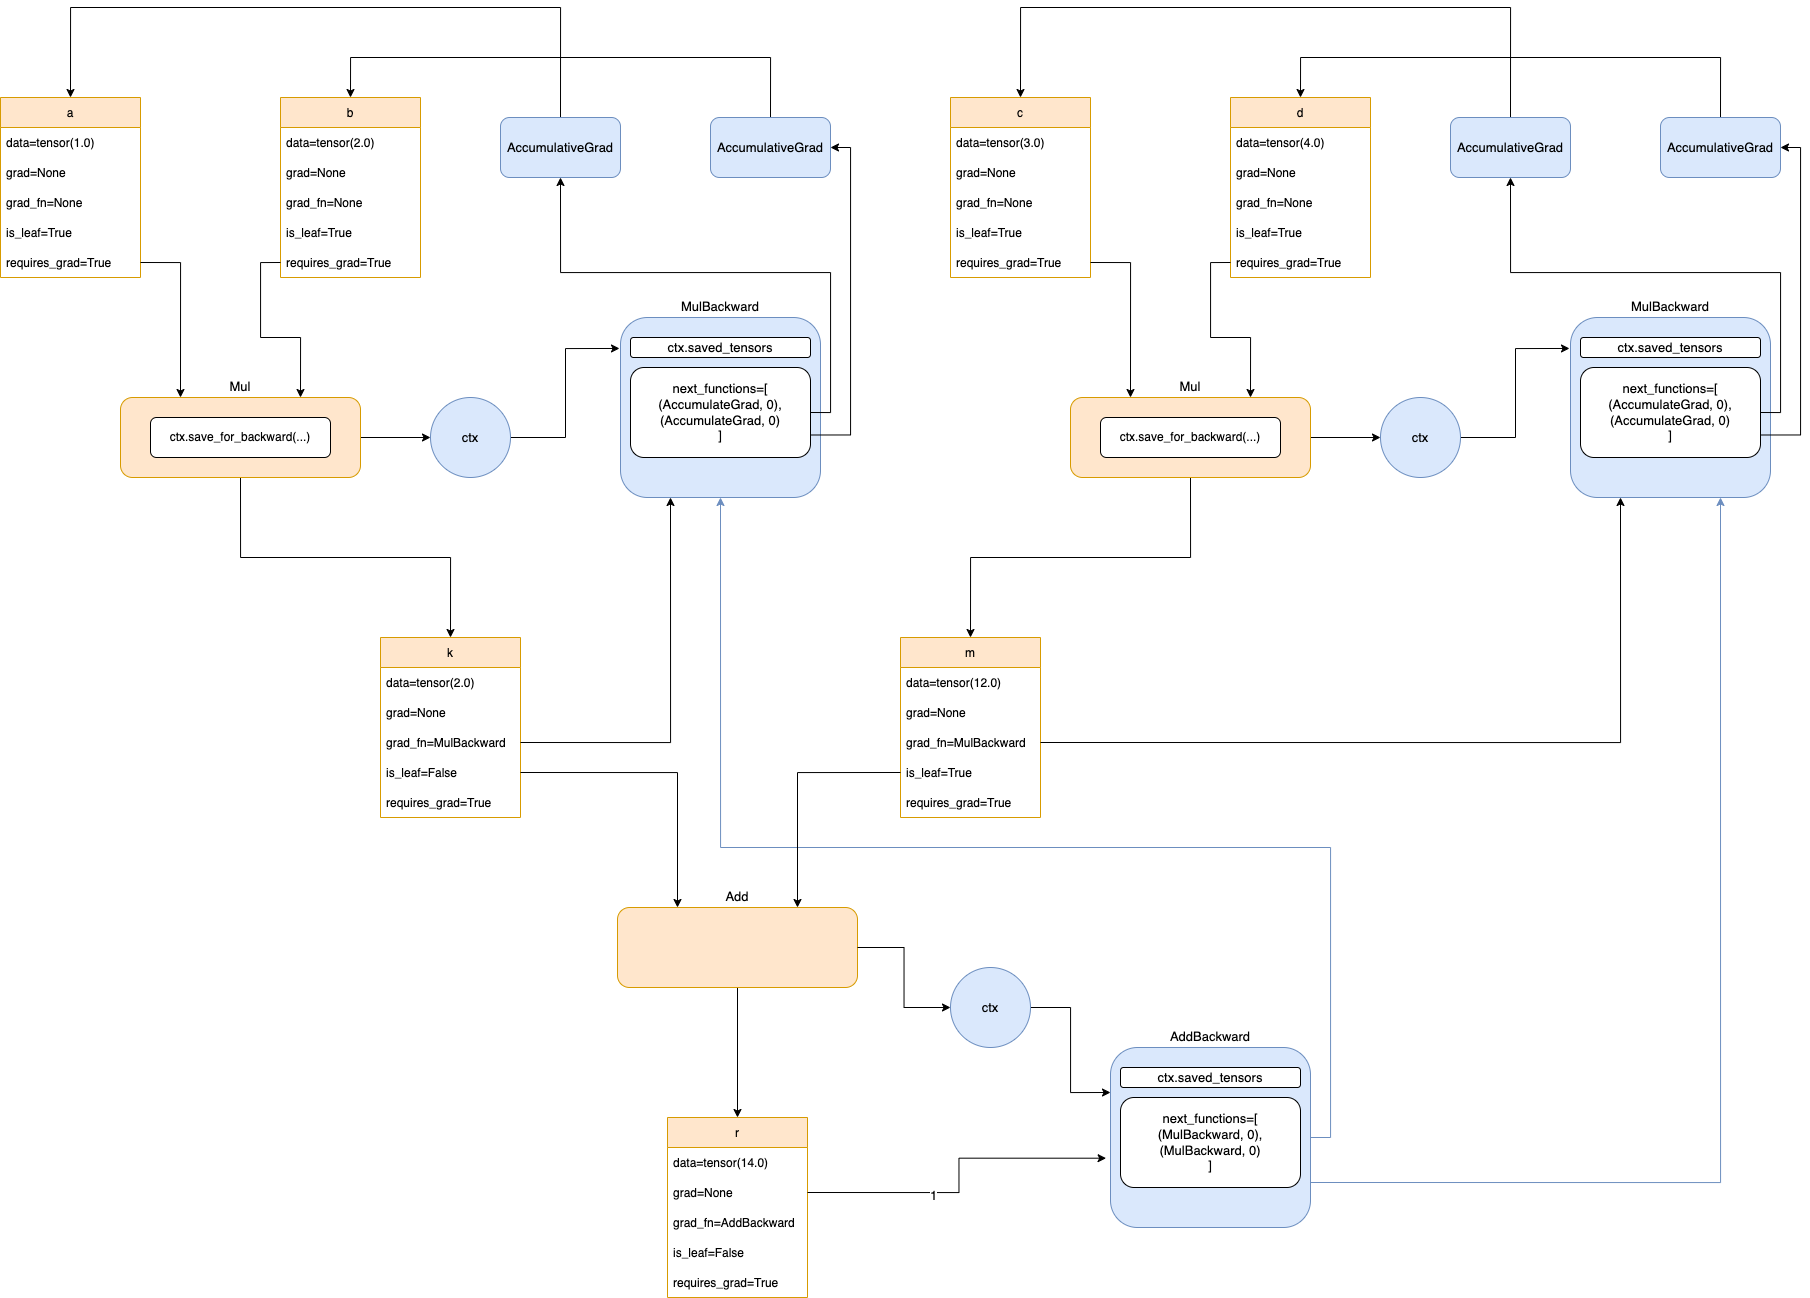

In [3]:
# a*b + c*d
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(2.0, requires_grad=True)

c = torch.tensor(3.0, requires_grad=True)
d = torch.tensor(4.0, requires_grad=True)

k = a*b
m = c*d

r = k+m
r.backward()

print(a.grad) # grad(a) = b = 2
print(b.grad) # grad(b) = a = 1
print(c.grad) # grad(c) = d = 4
print(d.grad) # grad(d) = c = 3


tensor(2.)
tensor(1.)
tensor(4.)
tensor(3.)


### **Домашнее задание 3:**
Поэксперементируйте с размером тензоров, которые влезут на видеоркарту в Colab. Найдите максимальный размер тензора для типа данных float32, float64, float16, int32, int64. На сколько они отличаются.

In [14]:
!nvidia-smi

Sun Dec  4 15:07:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    26W /  70W |    610MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
def allocate_empty_tensor(dim_size, dt):
  a=torch.zeros(4096,dim_size,dtype=dt,device='cuda')

In [31]:
torch.cuda.max_memory_reserved()

10204741632

In [36]:

torch.cuda.empty_cache()

dts = (torch.float32, torch.float64, torch.float16, torch.int32, torch.float64)
dims = (50000, 150000, 250000, 550000)
for dt in dts:
  for dim in dims:
    allocate_empty_tensor(dim, dt)
    print('Memory taken: ', round(100 * torch.cuda.memory_reserved() / torch.cuda.max_memory_reserved(), 2), '%', 'dims =', dim, 'dtype =', dt)
    torch.cuda.empty_cache()
  

Memory taken:  19.73 % dims = 50000 dtype = torch.float32
Memory taken:  35.78 % dims = 150000 dtype = torch.float32
Memory taken:  51.85 % dims = 250000 dtype = torch.float32
Memory taken:  100.0 % dims = 550000 dtype = torch.float32
Memory taken:  27.76 % dims = 50000 dtype = torch.float64
Memory taken:  59.86 % dims = 150000 dtype = torch.float64
Memory taken:  91.99 % dims = 250000 dtype = torch.float64


RuntimeError: ignored

### **Домашнее задание 4:**
Напишите хороший пример неэффективного кода для занятия памяти видеокарты, который вызовет ошибку out of memory

In [3]:
torch.cuda.memory_allocated()

0

In [5]:
torch.cuda.memory_reserved()


0

In [ ]:
# Хороший вариант - создавать гигантские батчи тензоров больших размерностей, как сделано в прошлом задании

### **Домашнее задание 5:**
Используя один линейный слой `nn.Linear` и один входной тензор `x` подберите подберите размерности так, чтобы занимать всю видеопамять.
Попробуйте применить линейный слой к тензору `x`. Что произойдет? Кратко опишите ваши эксперименты. Что вы поняли?

**Вывод**: Процент занимаемой памяти не растет в зависимости от размера линейного слоя и входного тензора

In [37]:
torch.cuda.max_memory_reserved()

10204741632

In [ ]:
def memo_layer(l_size, x):
  fc = nn.Linear(l_size, l_size)
  return fc(x)


b_size=15000
l_sizes = [8092, 8092*2, 8092*5, 8092*10]
for l in l_sizes:
  print(f'l_size: {l}; memo_used: {100* torch.cuda.memory_reserved() / torch.cuda.max_memory_reserved()} %')
  x = torch.zeros([b_size, l])
  memo_layer(l, x)


l_size: 8092; memo_used: 11.69338265515824 %
l_size: 16184; memo_used: 11.69338265515824 %
l_size: 40460; memo_used: 11.69338265515824 %
